In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

____
## Basic Facts About The Data

This project is focused on publicly available data from [LendingClub.com](www.lendingclub.com). 

Lending Club goal is to connect people who need borrowers with investors. We'll pretend we work for an investor and want to evaluate the likelihood that potential borrowers will pay back their loans.

We will focus on lending data from 2007-2010 and try to classify and predict whether or not the borrowers paid back their loans in full. The data is available at https://www.lendingclub.com/info/download-data.action, but we'll start with a CSV file containing cleaned data.

Here are what the columns represent:
* <b>credit.policy</b>: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* <b>purpose</b>: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* <b>int.rate</b>: The interest rate of the loan in decimal form.
* <b>installment</b>: The monthly installments owed by the borrower if the loan is funded.
* <b>log.annual.inc</b>: The natural log of the self-reported annual income of the borrower.
* <b>dti</b>: The debt-to-income ratio of the borrower.
* <b>fico</b>: The FICO credit score of the borrower.
* <b>days.with.cr.line</b>: The number of days the borrower has had a credit line.
* <b>revol.bal</b>: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* <b>revol.util</b>: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* <b>inq.last.6mths</b>: The borrower's number of inquiries by creditors in the last 6 months.
* <b>delinq.2yrs</b>: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* <b>pub.rec</b>: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* <b>not.fully.paid</b>: 1 if the loan was not fully paid, and 0 otherwise.

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


The average value of not.fully.paid is 0.16, which means many more people fully paid their loans than not. This means the data is unbalanced, and we may find it hard to get good results predicting 1 (which is the point of this work). More specifically:

In [3]:
loans['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

There are roughly 5 times as many 0 values as there are 1 values.

____
## Exploratory Data Analysis

First, let's explore how the FICO credit rating of borrowers affects whether or not they meet the credit underwriting criteria.

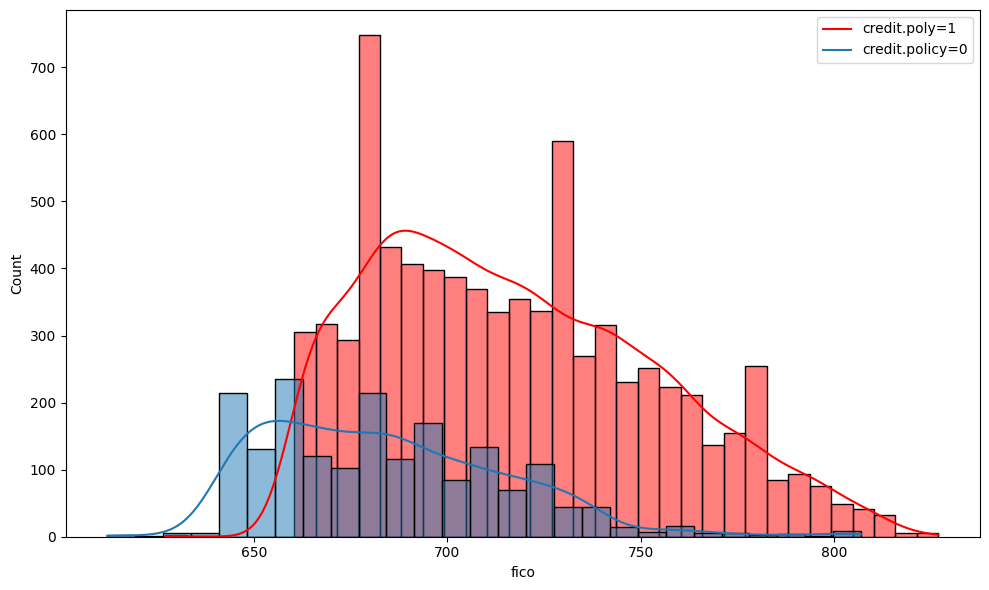

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(data=loans[loans['credit.policy']==1], x='fico', alpha=0.5, color='r', kde=True)
sns.histplot(data=loans[loans['credit.policy']==0], x='fico', alpha=0.5, kde=True)
plt.legend(['credit.poly=1', 'credit.policy=0'])
plt.tight_layout()

There were many more people who met the credit underwriting criteria than ones who didn't. Those who didn't meet the criteria tended to have lower FICO credit scores.

[]

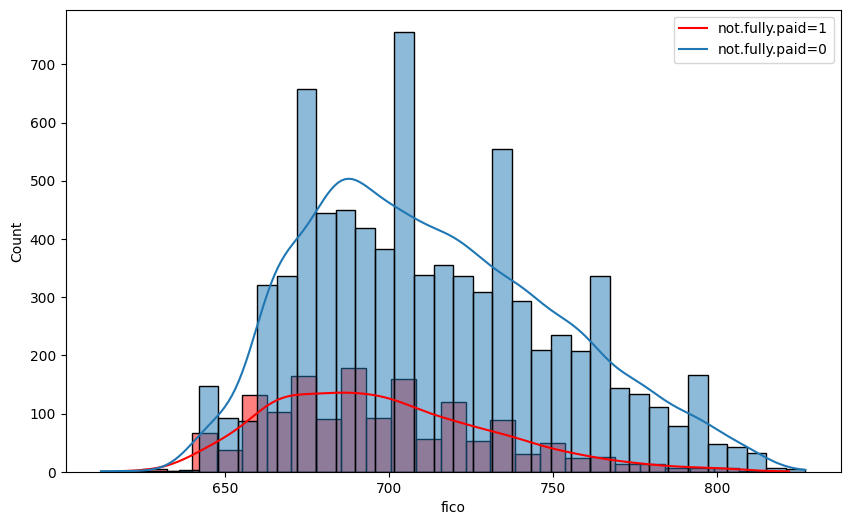

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data=loans[loans['not.fully.paid']==1], x='fico', alpha=0.5, color='r', kde=True)
sns.histplot(data=loans[loans['not.fully.paid']==0], x='fico', alpha=0.5, kde=True)
plt.legend(['not.fully.paid=1', 'not.fully.paid=0'])
plt.plot()

The distribution of payment status based on FICO score does not differ significantly between fully paid and not fully paid, at least in general shape. The distribution of fully paid is more sharply peaked around its maximum count value than the distribution of not fully paid. There were far more people who fully paid the loan than people who did not fully paid it, as observed earlier.

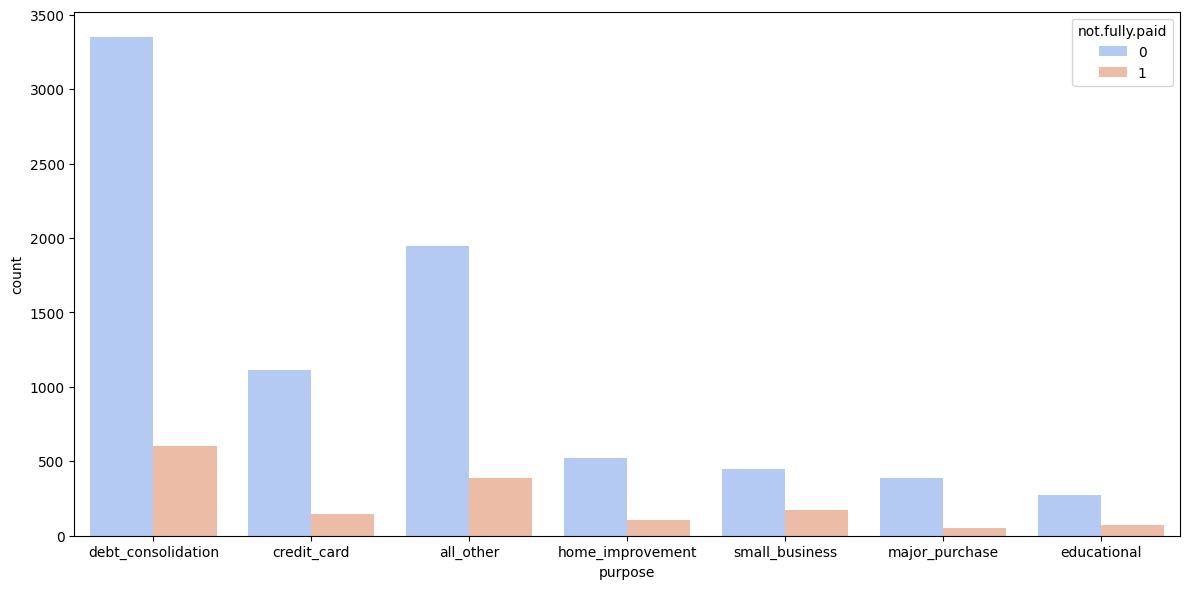

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=loans, x=loans['purpose'], hue='not.fully.paid', dodge=True, gap=0, palette='coolwarm')
plt.tight_layout()

By far the largest reason people are seeking a loan is for debt consolidation. In all cases the number of fully paid is larger than the number of not fully paid, which tracks with the over all value counts.

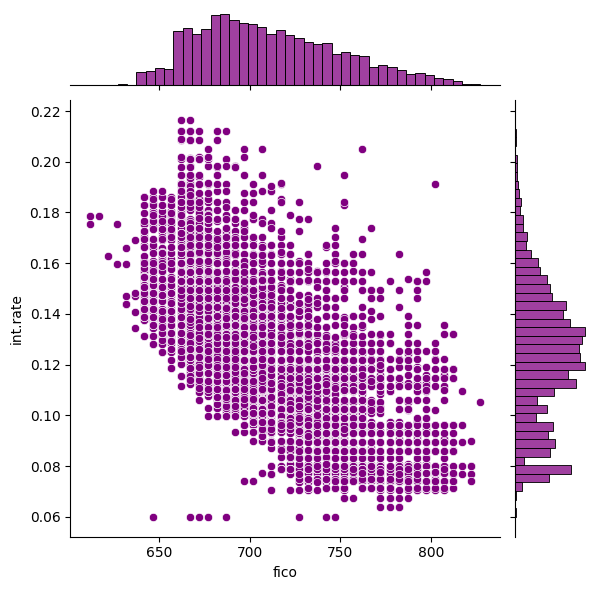

In [36]:
sns.jointplot(data=loans, x='fico', y='int.rate', color='purple')

The interest rates have a pretty bimodal distribution, but the majority are concentrated around about 13%. The lower bound on interest rates decreases as fico increases until about 730, where it saturates at about 7%. The upper bound on the interest rates has the same behavior, except it never really saturates. Over all, there is a quite strong negative correlation between FICO score and interest rate -- the better the credit score, the lower the interest rate, which makes sense.

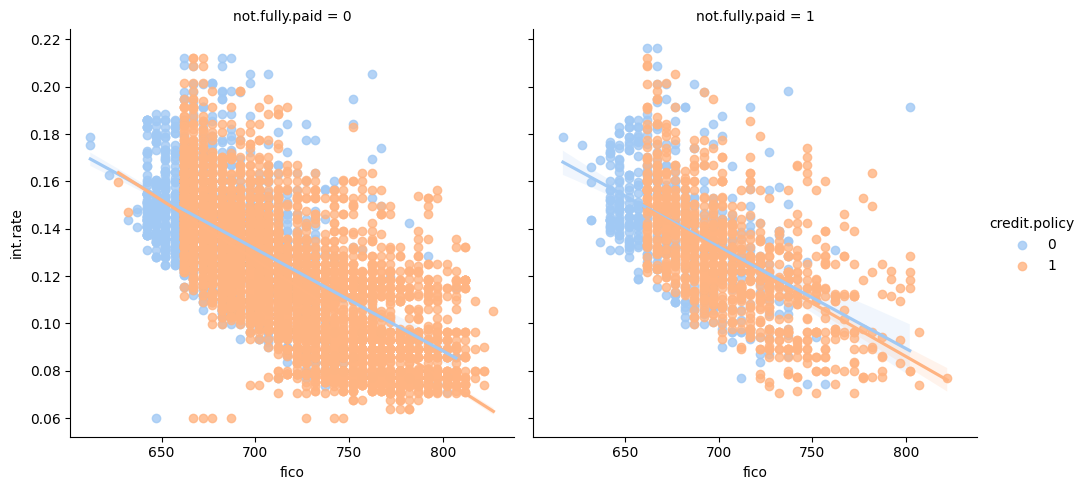

In [42]:
sns.lmplot(data=loans, x='fico', y='int.rate', col='not.fully.paid', hue='credit.policy', palette='pastel')

The trend between fico and interest rate does not actually seem to depend much on the credit policy or the payment status. The slope for credit.policy=1 seems bigger (more negative) for not.fully.paid=0.

In [12]:
loans.corr(numeric_only=True)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


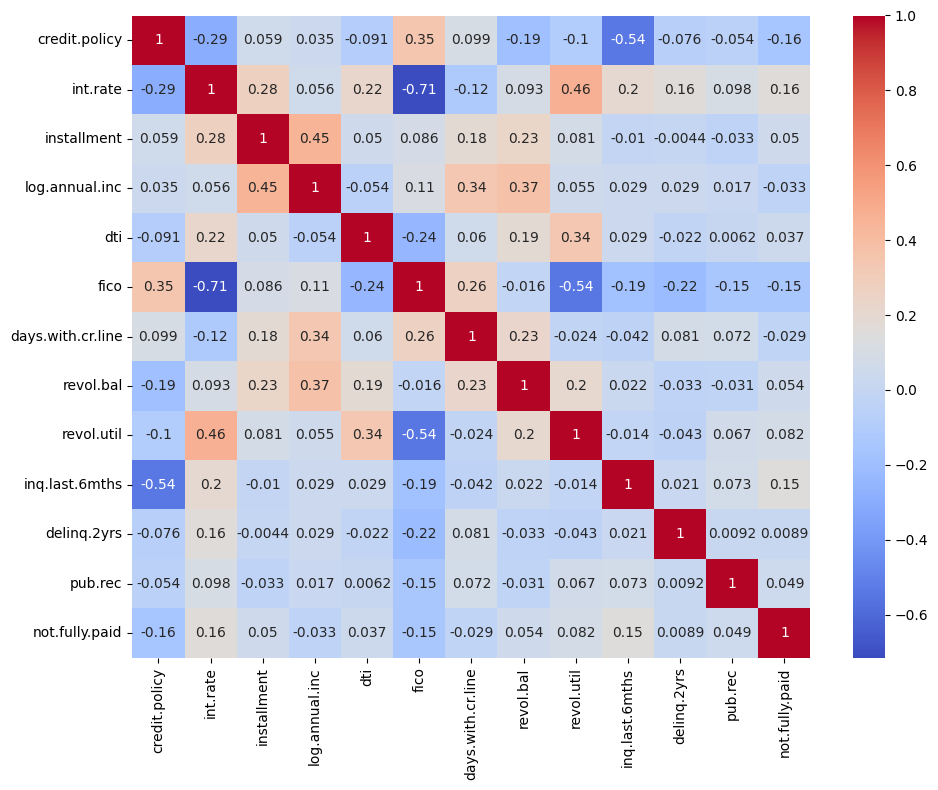

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(loans.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.tight_layout()

There are no great correlations between payment status and any of the features. The strongest positive correlation with not.fully.paid is with interest rate, and the strongest negative correlation with **not.fully.paid** is satisfying the credit underwriting criteria. In a close second, FICO score has a significant negative correlation with **not.fully.paid**.

____
## Preparing Data

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [43]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


The **purpose** column is the only non-numerical column, and therefore we did not investigate its correlations with payment status during exploratory analysis.

We must transform that column using dummy variables in order to train a model.

In [77]:
cat_feats = ['purpose']
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first = True)

In [20]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

We want to rescale the numeric data, but we need to be careful because **credit.policy** is actually Boolean. Since we've already added in dummy variables for the categorical **purpose** column, we might as well just specify the numerical variables we want to scale.

In [27]:
numeric_vars = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line',
                'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('not.fully.paid', axis=1), final_data['not.fully.paid'], test_size=0.3,
                                                    random_state=101)

Since we want to only scale the numerical data and prevent data leakage, we need to fit_transform the scaler on the numerical part of the training data and then transform the numerical part of the test data.

In [36]:
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_vars]), columns=numeric_vars, index=X_train.index)
X_train_scaled = pd.concat([X_train.drop(numeric_vars, axis=1), X_train_num_scaled], axis=1)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test[numeric_vars]), columns=numeric_vars, index=X_test.index)
X_test_scaled = pd.concat([X_test.drop(numeric_vars, axis=1), X_test_num_scaled], axis=1)

____
## Training A Decision Tree Model

In [42]:
from sklearn.tree import DecisionTreeClassifier

Our data is not balanced, so we're going to construct the decision tree classifier to hopefully take that into account.

In [65]:
dtree = DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight='balanced')

### Predictions and Evaluation of Decision Tree

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
predictions = dtree.predict(X_test_scaled)
print('Classification Report: \n', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2431
           1       0.20      0.22      0.21       443

    accuracy                           0.75      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.75      0.75      2874



Confusion Matrix: 
 [[2052  379]
 [ 347   96]]


Predicatably, since the data is unbalanced we are not seeing great control over the 1 results. We can try tuning the decision threshold of the decision tree classifier to see if that helps.

In [47]:
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import make_scorer, f1_score

In [52]:
from sklearn.metrics import recall_score

In [64]:
base_model =DecisionTreeClassifier(class_weight='balanced')
model_tuned = TunedThresholdClassifierCV(base_model, scoring='f1_weighted').fit(X_train_scaled, y_train)
#print(scorer(model_tuned.fit(X_train_scaled, y_train), X_train_scaled, y_train))
# compare it with the internal score found by cross-validation
#print(model.best_score_)
print(f"Cut-off point found at {model_tuned.best_threshold_:.3f}")

Cut-off point found at 0.010


In [63]:
predictions = model_tuned.predict(X_test_scaled)
print('Classification Report: \n', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



Confusion Matrix: 
 [[2004  427]
 [ 345   98]]


Unfortunately the tuned version of the classifier is marginally worse than the one with standard cut off at 0.5, if we use weighted f1 score as a scorer.

____
## Training A Random Forest model

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rand_dtree = RandomForestClassifier(class_weight='balanced')
rand_dtree.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced')

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [70]:
rand_preds = rand_dtree.predict(X_test_scaled)

In [72]:
print('Classification Report: \n', classification_report(y_test, rand_preds))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test,rand_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.60      0.01      0.03       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.47      2874
weighted avg       0.81      0.85      0.78      2874



Confusion Matrix: 
 [[2427    4]
 [ 437    6]]


This model is pretty bad at correctly predicting if a borrower won't repay the loan, which is the whole point of the model. Clearly some extra feature engineering should be done.

____
## Brute Force Dimensional Reduction

Let's try reducing the features to the most correlated ones: **credit.policy**, **int.rate**, **fico**, and **inq.last6mths**

In [73]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [78]:
final_data_reduced = final_data.drop(['installment', 'log.annual.inc', 'dti', 'days.with.cr.line', 'revol.bal',
                                      'revol.util', 'delinq.2yrs', 'pub.rec'], axis=1)

In [80]:
final_data_reduced.head()

,credit.policy,int.rate,fico,inq.last.6mths,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,737,0,0,False,True,False,False,False,False
1,1,0.1071,707,0,0,True,False,False,False,False,False
2,1,0.1357,682,1,0,False,True,False,False,False,False
3,1,0.1008,712,1,0,False,True,False,False,False,False
4,1,0.1426,667,0,0,True,False,False,False,False,False


In [79]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(final_data_reduced.drop('not.fully.paid', axis=1), final_data['not.fully.paid'], test_size=0.3,
                                                    random_state=101)

In [82]:
numeric_vars_r = ['credit.policy', 'int.rate', 'fico', 'inq.last.6mths']
scaler2 = StandardScaler()
Xr_train_num_scaled = pd.DataFrame(scaler2.fit_transform(Xr_train[numeric_vars_r]), columns=numeric_vars_r, index=Xr_train.index)
Xr_train_scaled = pd.concat([Xr_train.drop(numeric_vars_r, axis=1), Xr_train_num_scaled], axis=1)
Xr_test_num_scaled = pd.DataFrame(scaler2.transform(Xr_test[numeric_vars_r]), columns=numeric_vars_r, index=Xr_test.index)
Xr_test_scaled = pd.concat([Xr_test.drop(numeric_vars_r, axis=1), Xr_test_num_scaled], axis=1)

In [85]:
dtree_r = DecisionTreeClassifier()
dtree_r.fit(Xr_train_scaled, yr_train)

DecisionTreeClassifier()

In [86]:
predictions_r = dtree_r.predict(Xr_test_scaled)
print('Classification Report: \n', classification_report(yr_test, predictions))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(yr_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2431
           1       0.20      0.22      0.21       443

    accuracy                           0.75      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.75      0.75      2874



Confusion Matrix: 
 [[2052  379]
 [ 347   96]]


____
## Conclusion

Unfortunately brute force dimensional reduction did not actually improve the recall performance of our model. Gathering more data would probably be the most time-effective way to improve the predictive power for the case we're interested in.